In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train_df = pd.read_csv('./data/features.csv')
print(train_df.shape)
pearson = train_df.corr()

(1452095, 52)


/Users/haiyangli/miniconda3/envs/pydata/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

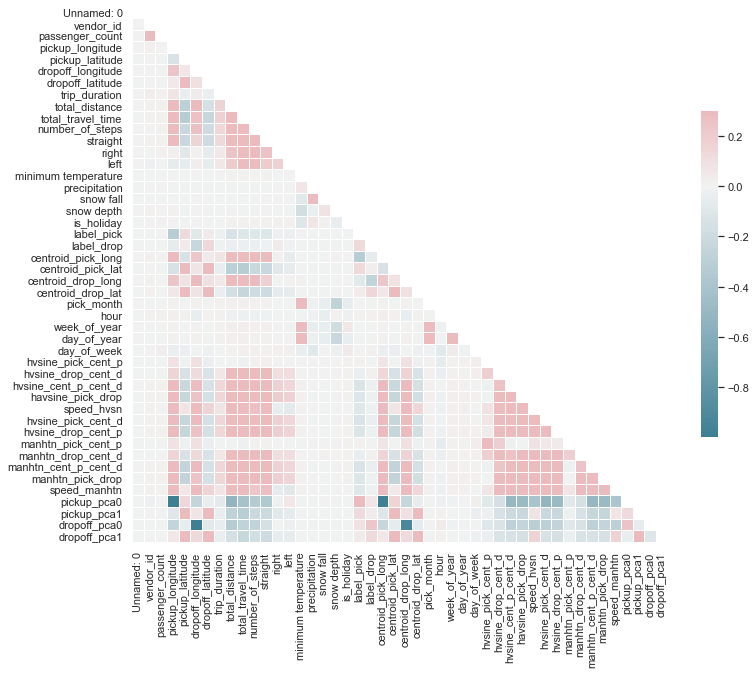

In [20]:
sns.set(style="white")

mask = np.zeros_like(pearson, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pearson, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#sns.heatmap(pearson)

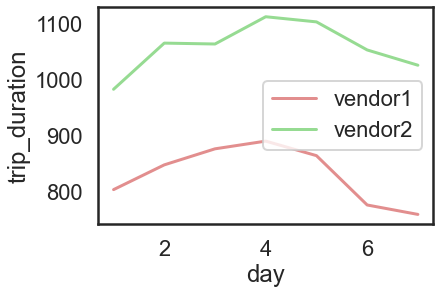

In [39]:
summary_wdays_avg_duration = pd.DataFrame(train_df.groupby(['vendor_id','day_of_week'])['trip_duration'].mean())
summary_wdays_avg_duration.reset_index(inplace = True)
vendor1 = summary_wdays_avg_duration[summary_wdays_avg_duration['vendor_id'] == 1]
vendor2 = summary_wdays_avg_duration[summary_wdays_avg_duration['vendor_id'] == 2]
plt.plot(np.arange(1,8,1),vendor1['trip_duration'], label='vendor1', color='r', alpha=0.7)
plt.plot(np.arange(1,8,1),vendor2['trip_duration'], label='vendor2', color='g', alpha=0.7)
plt.xlabel('day')
plt.ylabel('trip_duration')
plt.legend()

plt.show()

/Users/haiyangli/miniconda3/envs/pydata/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/haiyangli/miniconda3/envs/pydata/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/haiyangli/miniconda3/envs/pydata/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

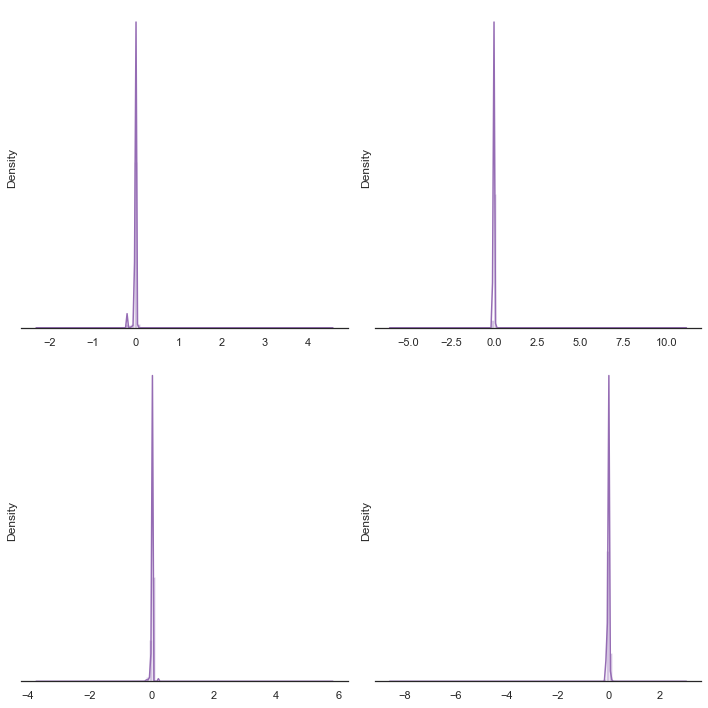

In [40]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False, sharey=False)
sns.despine(left=True)
sns.distplot(train_df['pickup_pca0'].values, label='pickup_pca0', color="m", bins=100, ax=axes[0, 0])
sns.distplot(train_df['pickup_pca1'].values, label='pickup_pca1', color="m", bins=100, ax=axes[0, 1])
sns.distplot(train_df['dropoff_pca0'].values, label='dropoff_pca0', color="m", bins=100, ax=axes[1, 0])
sns.distplot(train_df['dropoff_pca1'].values, label='dropoff_pca1', color="m", bins=100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [ ]:
datanew = train_df[train_df['trip_duration'] > 60 ]
datanew = datanew[datanew['trip_duration'] < 3600]
#表示用pca0，pca1当做坐标，对应的点颜色代表duration的大小
X = list(datanew['pickup_pca0'])
Y = list(datanew['pickup_pca1'])
Z = list(datanew['trip_duration'])
plt.scatter(X,Y,s = 15,c = Z,alpha = .5)
plt.xlim(-0.8,0.8)
plt.ylim(-1.0,1.0)
plt.show()